In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset
dataset = pd.read_csv('PL_Match_Stats.csv').dropna()

In [3]:
# Encode target variable
encoder = OneHotEncoder()
y = encoder.fit_transform(dataset['Win / Tie'].values.reshape(-1, 1)).toarray()

In [4]:
# Define feature columns
feature_cols = [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,47,48,49,
                50,51,52,53,54,55,56,57,58,59,60,61,79,80,81,82,83,84,85,86,87,88,89,
                90,91,92,99,100,101,102,103,104,105,106,107,108,109,110,111,112]

In [5]:

# Select features
X = dataset.iloc[:, feature_cols]

# Scale all X indipendant variables to have values between 0 - 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:

# Convert X_scaled to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Check for zero variance features, since zero variance variables will throw the model offcourse.
non_zero_var_cols = X_scaled_df.columns[X_scaled_df.var() > 0]

In [8]:
# Select features with non-zero variance
X_scaled_df_non_zero_var = X_scaled_df[non_zero_var_cols]

In [11]:
# Check correlation between features and target variable
correlation_matrix = X_scaled_df_non_zero_var.corrwith(pd.Series(y[:,0]))

There is no linear relationship between our X independant variables and predicted ŷ match outcomes. 

There for Linear Regression model will not be succifient in determining desired match outcomes!

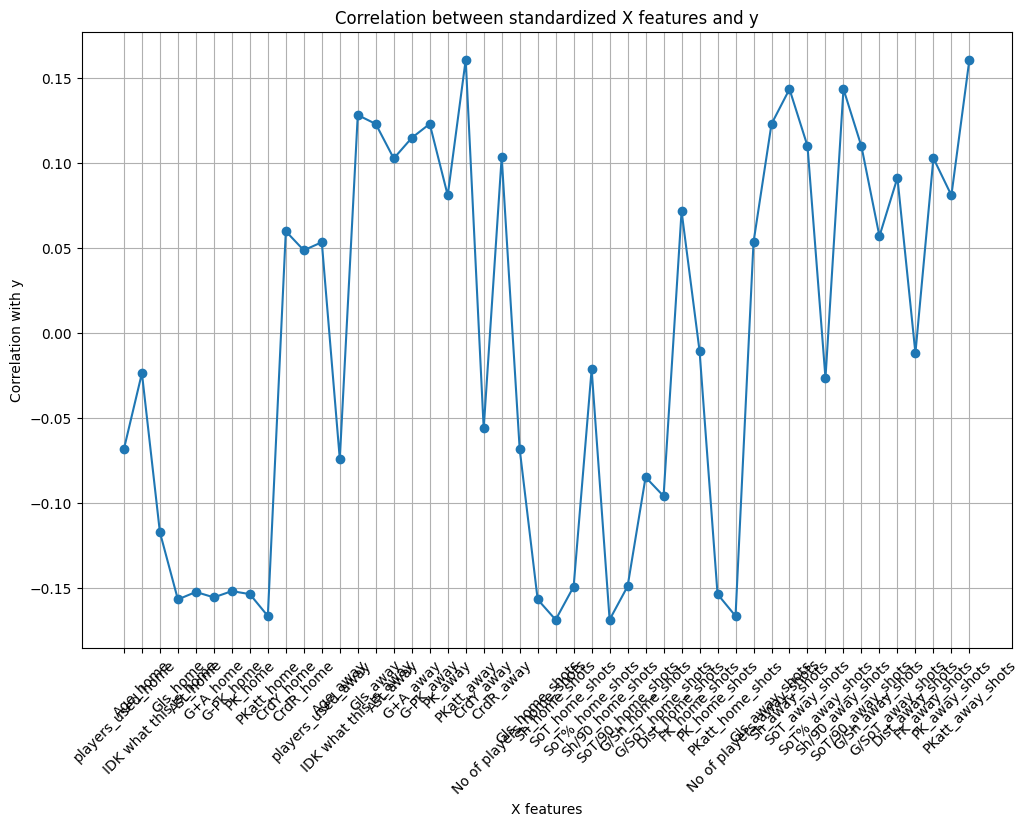

In [10]:
# Visualize correlations
plt.figure(figsize=(12, 8))
plt.plot(correlation_matrix.index, correlation_matrix.values, marker='o', linestyle='-')
plt.title('Correlation between standardized X features and y')
plt.xlabel('X features')
plt.ylabel('Correlation with y')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()